In [1]:
import numpy as np
import tensorflow as tf
import itertools
%matplotlib inline
import pylab
from mpl_toolkits.mplot3d import Axes3D
from IPython import display

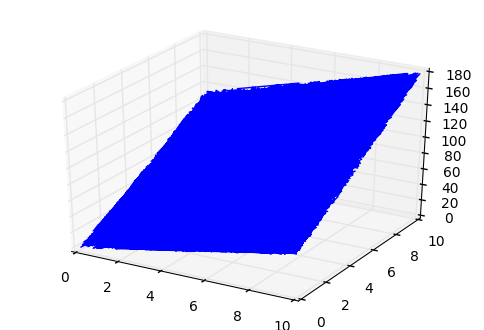

In [2]:
# Let's look at our training data in 3D
train_data = np.loadtxt(open("training_data.csv","rb"), delimiter=",")
x_data = train_data[:,0:2]
y_data = train_data[:,2]
fig = pylab.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_data[:,0], x_data[:,1], y_data)

In [3]:
W = tf.get_variable(shape=[2,1], name='weights')

In [4]:
b = tf.get_variable(shape=[], name='bias')

In [5]:
x = tf.placeholder(shape=[None, 2], dtype=tf.float32, name='x')

In [6]:
# For multivariate regression we want a matrix multiplication here. 
y = tf.matmul(x, W) + b

In [7]:
sw = tf.train.SummaryWriter('.', graph=tf.get_default_graph())

In [8]:
init = tf.initialize_all_variables()
sess = tf.Session()

In [9]:
# This initialized the variables. You can re-run this to reset the model
sess.run(init)

In [10]:
x_in = [[3, 4], [7, 5]]  # Two input values: 3,4; and 7,5.

In [11]:
sess.run(y, feed_dict={x: x_in})

array([[-2.79004145],
       [-5.3118391 ]], dtype=float32)

In [12]:
y_label = tf.placeholder(shape=[None], dtype=tf.float32, name='y_label')
diff = y - y_label
L = tf.reduce_mean(diff * diff)

In [13]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(L)

In [14]:
eval_data = np.loadtxt(open("eval_data.csv","rb"), delimiter=",")
def eval(limit=None):
    x_eval = eval_data[:limit,0:2] if limit else eval_data[:,0:2]
    y_eval = eval_data[:limit,2] if limit else eval_data[:,2]
    return sess.run(L, feed_dict={x: x_eval, y_label: y_eval})

In [15]:
eval()

8858.1162

In [16]:
batch_size = 1000
num_epochs = 100

filename_queue = tf.train.string_input_producer(["training_data.csv"], num_epochs=num_epochs)
sess.run(tf.initialize_local_variables())
reader = tf.TextLineReader()
key, line = reader.read(filename_queue)
x1, x2, y_in = tf.decode_csv(line, record_defaults=[[0.0], [0.0], [0.0]])
x_in = tf.pack([x1,x2])
print x1.get_shape(), x2.get_shape(), y_in.get_shape()
x_train, y_train = tf.train.batch([x_in, y_in], batch_size=batch_size)
print x_train.get_shape(), y_train.get_shape()
tf.train.start_queue_runners(sess)

() () ()
(1000, 2) (1000,)


[<Thread(Thread-5, started daemon 123145336127488)>,
 <Thread(Thread-6, started daemon 123145340334080)>]

In [21]:
yq = tf.matmul(x_train, W) + b
diff = yq - y_train
Lq = tf.reduce_mean(diff * diff)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(Lq)

()


In [22]:
try:
    for i in xrange(100000):
        _, lq = sess.run([train, Lq])
        if i % 10 == 0:
            print "batch %d: training loss %f" % (i, lq)
except tf.errors.OutOfRangeError:
    print "done, iteration %d, eval loss %f" % (i, eval())

batch 0: training loss 1530.580444
batch 10: training loss 1529.425171
batch 20: training loss 1528.318848
batch 30: training loss 1527.285645
batch 40: training loss 1526.303223
batch 50: training loss 1525.393311
batch 60: training loss 1524.510864
batch 70: training loss 1523.694824
batch 80: training loss 1522.923462
batch 90: training loss 1522.195190
batch 100: training loss 1521.508179
batch 110: training loss 1520.854980
batch 120: training loss 1520.243408
batch 130: training loss 1519.664185
batch 140: training loss 1519.116455
batch 150: training loss 1518.619873
batch 160: training loss 1518.126343
batch 170: training loss 1517.675293
batch 180: training loss 1517.243042
batch 190: training loss 1516.840210
batch 200: training loss 1516.451050
batch 210: training loss 1516.076904
batch 220: training loss 1515.748657
batch 230: training loss 1515.423828
batch 240: training loss 1515.124390
batch 250: training loss 1514.843994
batch 260: training loss 1514.573608
batch 270: t

In [23]:
saver = tf.train.Saver()
saver.save(sess, 'my_checkpoint.ckpt')

'my_checkpoint.ckpt'

In [24]:
sess.run(init)
eval()

7473.311

In [25]:
saver.restore(sess, 'my_checkpoint.ckpt')
eval()

1442.9102